In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler 

In [80]:
# Reading Dataset.

df  = pd.read_csv("adult.csv", na_values = '?')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [81]:
# Removing educatrional-num feature.
# It provide same information as education feature

df.drop("educational-num", inplace = True, axis = 1)
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [82]:
# Statictical Analysis.

df.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,99999.000000,4356.000000,99.000000


In [83]:

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 14 columns):
age               48842 non-null int64
workclass         46043 non-null object
fnlwgt            48842 non-null int64
education         48842 non-null object
marital-status    48842 non-null object
occupation        46033 non-null object
relationship      48842 non-null object
race              48842 non-null object
gender            48842 non-null object
capital-gain      48842 non-null int64
capital-loss      48842 non-null int64
hours-per-week    48842 non-null int64
native-country    47985 non-null object
income            48842 non-null object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB
None


In [84]:
# Removing fnlwgt column.

df.drop('fnlwgt', axis = 1, inplace = True)

df.head()

,age,workclass,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [85]:
# Handling mising values

df.dropna(how  = 'any', axis = 0, inplace  = True)

df.shape

(45222, 13)

In [86]:
# Extract numerical columns.
num = df.select_dtypes(include = ['int64'])

num.head()

,age,capital-gain,capital-loss,hours-per-week
0,25,0,0,40
1,38,0,0,50
2,28,0,0,40
3,44,7688,0,40
5,34,0,0,30


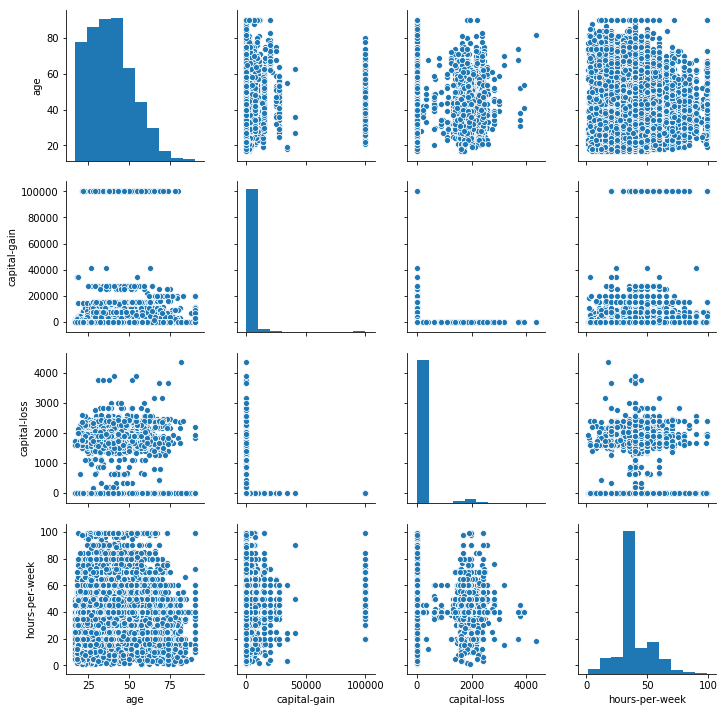

In [87]:
# To see relation between  numerical features.

sns.pairplot(num)
plt.show()

In [88]:
# Finding co-relation .

cor = num.corr()

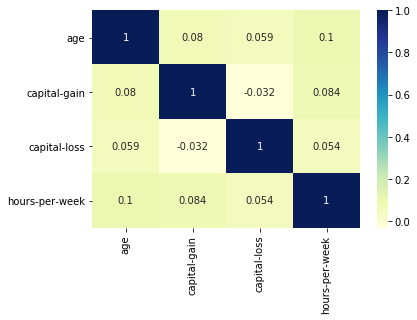

In [89]:
# Plot HeatMap.

sns.heatmap(cor, cmap = 'YlGnBu', annot=True)
plt.show()

In [90]:
# Extracting categorical columns.

catg = df.select_dtypes(include = ['object'])

catg.head()

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50K
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50K
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50K
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50K
5,Private,10th,Never-married,Other-service,Not-in-family,White,Male,United-States,<=50K


In [91]:
# Standardization.
# Numerical feature

min_max = MinMaxScaler()
num_feat = min_max.fit_transform(num)
df_num = pd.DataFrame(num_feat, columns = num.columns)

df_num.head()

C:\Users\Aatif Khan Pathan\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning:

Data with input dtype int64 were all converted to float64 by MinMaxScaler.



,age,capital-gain,capital-loss,hours-per-week
0,0.109589,0.000000,0.0,0.397959
1,0.287671,0.000000,0.0,0.500000
2,0.150685,0.000000,0.0,0.397959
3,0.369863,0.076881,0.0,0.397959
4,0.232877,0.000000,0.0,0.295918


In [93]:
# Catagorical feature

# Dummy variable
df_dummy = pd.get_dummies(catg[['workclass', 'race','marital-status','relationship', 'native-country', 'occupation','education']])
df_cat = pd.concat([catg, df_dummy], axis = 1 )
df_cat.drop(['workclass', 'race', 'marital-status','relationship','native-country','occupation','education'], axis = 1, inplace = True)

# Binomial
df_cat['gender'].replace({'Female': 1, 'Male' : 0}, inplace = True)
df_cat['income'].replace({'>50K': 1, '<=50K' : 0}, inplace = True)

df_cat.head()

,gender,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,race_Amer-Indian-Eskimo,...,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
# New standardized dataframe.

new_df = pd.concat([df_num, df_cat], axis = 1)

new_df.head()

,age,capital-gain,capital-loss,hours-per-week,gender,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college
0,0.109589,0.000000,0.0,0.397959,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.287671,0.000000,0.0,0.500000,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.150685,0.000000,0.0,0.397959,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.369863,0.076881,0.0,0.397959,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.232877,0.000000,0.0,0.295918,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [95]:
# Rmoving missing vallues

new_df.dropna(how = 'any', axis = 0, inplace = True)

new_df.head()

,age,capital-gain,capital-loss,hours-per-week,gender,income,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college
0,0.109589,0.000000,0.0,0.397959,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.287671,0.000000,0.0,0.500000,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.150685,0.000000,0.0,0.397959,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.369863,0.076881,0.0,0.397959,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.630137,0.031030,0.0,0.316327,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
# Extracting target variable.

y = new_df.pop('income')
x = new_df

In [97]:
# Spltting data into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y , train_size = 0.7, random_state = 100)

C:\Users\Aatif Khan Pathan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.



In [98]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(29318, 101) (29318,)
(12565, 101) (12565,)


# <b> Logistic Regression</b>

In [99]:
# Model salection.

from sklearn.linear_model  import LogisticRegression
regression  = LogisticRegression()
regression.fit(X_train, y_train)

C:\Users\Aatif Khan Pathan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [100]:
# Predicting the test data

y_test_predict  = regression.predict(X_test)

<b>Measuring Performance</b>

In [101]:
# Accuracy

from sklearn import metrics
metrics.accuracy_score(y_test, y_test_predict)

0.833107839235973

[[8768  709]
 [1388 1700]]


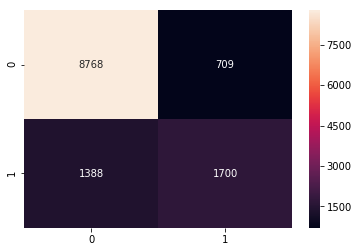

In [102]:
# Confusion metric

conf_metrix = metrics.confusion_matrix(y_test, y_test_predict)
print(conf_metrix)

sns.heatmap(conf_metrix, annot = True, fmt = 'd')
plt.show()

In [103]:
print( metrics.classification_report(y_test, y_test_predict) )

print(' accuracy : ', metrics.accuracy_score(y_test, y_test_predict))

# Number of Features  = 102

              precision    recall  f1-score   support

         0.0       0.86      0.93      0.89      9477
         1.0       0.71      0.55      0.62      3088

   micro avg       0.83      0.83      0.83     12565
   macro avg       0.78      0.74      0.76     12565
weighted avg       0.82      0.83      0.83     12565

 accuracy :  0.833107839235973


# Recursive Feature Elimination

In [126]:
# Feature selection

from sklearn.feature_selection import RFE
rfe = RFE(regression, 60)


In [127]:
# Fitting  data
 
rfe = rfe.fit(X_train, y_train)

C:\Users\Aatif Khan Pathan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Aatif Khan Pathan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Aatif Khan Pathan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Aatif Khan Pathan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Aatif Khan Pathan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence 

C:\Users\Aatif Khan Pathan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



In [129]:
temp_df = pd.DataFrame({'columns' : X_train.columns, 'included' : rfe.support_, 'ranking' : rfe.ranking_ })

temp_df

,columns,included,ranking
0,age,False,32
1,capital-gain,False,16
2,capital-loss,False,11
3,hours-per-week,False,39
4,gender,True,1
5,workclass_Federal-gov,True,1
6,workclass_Local-gov,False,19
7,workclass_Private,False,20
8,workclass_Self-emp-inc,True,1
9,workclass_Self-emp-not-inc,True,1


In [130]:
# Salecting inportant features

imp_col = X_train.columns[rfe.support_]
imp_col

Index(['gender', 'workclass_Federal-gov', 'workclass_Self-emp-inc',
       'workclass_Self-emp-not-inc', 'workclass_State-gov',
       'race_Amer-Indian-Eskimo', 'race_Other', 'marital-status_Divorced',
       'marital-status_Married-AF-spouse', 'marital-status_Married-civ-spouse',
       'marital-status_Never-married', 'marital-status_Separated',
       'relationship_Other-relative', 'relationship_Own-child',
       'relationship_Wife', 'native-country_Cambodia', 'native-country_Canada',
       'native-country_China', 'native-country_Columbia',
       'native-country_Dominican-Republic', 'native-country_Ecuador',
       'native-country_El-Salvador', 'native-country_England',
       'native-country_Greece', 'native-country_Guatemala',
       'native-country_Hungary', 'native-country_Ireland',
       'native-country_Italy', 'native-country_Mexico',
       'native-country_Nicaragua', 'native-country_Peru',
       'native-country_Portugal', 'native-country_Scotland',
       'native-countr

In [131]:
X_train_new = X_train[imp_col]

X_train_new.head()

,gender,workclass_Federal-gov,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,race_Amer-Indian-Eskimo,race_Other,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,...,education_1st-4th,education_5th-6th,education_7th-8th,education_9th,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school
35381,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
31556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
26713,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
40355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
24293,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


<b>Making model using less features<b/>

In [171]:
# Logistic Regression Model

regression_new = LogisticRegression()
regression_new.fit(X_train_new, y_train)

C:\Users\Aatif Khan Pathan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [133]:
# prediction

X_test_new = X_test[imp_col]

y_predict_new = regression_new.predict(X_test_new)

<b>Measuring Performance</b>

In [134]:
# Accuracy

metrics.accuracy_score(y_test, y_predict_new)

0.8341424592120971

[[8777  700]
 [1384 1704]]


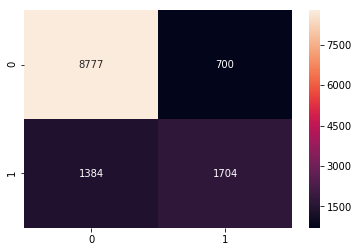

In [138]:
# Confusion metric

conf_metrix = metrics.confusion_matrix(y_test, y_predict_new)
print(conf_metrix)

sns.heatmap(conf_metrix, annot = True, fmt = 'd')
plt.show()

In [139]:
print( metrics.classification_report(y_test, y_predict_new) )

print(' accuracy : ', metrics.accuracy_score(y_test, y_predict_new))

# Number of Features  = 60

              precision    recall  f1-score   support

         0.0       0.86      0.93      0.89      9477
         1.0       0.71      0.55      0.62      3088

   micro avg       0.83      0.83      0.83     12565
   macro avg       0.79      0.74      0.76     12565
weighted avg       0.83      0.83      0.83     12565

 accuracy :  0.8341424592120971


# PCA

In [140]:
from sklearn.decomposition import PCA
pca = PCA()

In [141]:
pca.fit(new_df) 

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [142]:
print(np.cumsum(pca.explained_variance_ratio_))

[0.17996248 0.25207945 0.31790841 0.37509999 0.42717713 0.47418139
 0.51689362 0.54989822 0.58196525 0.6108167  0.63883978 0.66445363
 0.68762172 0.70974447 0.72980435 0.74892876 0.76643348 0.78247726
 0.79583854 0.80809208 0.81989474 0.83091008 0.84174908 0.85199196
 0.86151181 0.87012026 0.87853331 0.88681863 0.89473363 0.90262337
 0.91035138 0.91795721 0.92502395 0.93174469 0.93798964 0.94275616
 0.94744349 0.95138507 0.95501116 0.95851707 0.96196578 0.96526945
 0.96841457 0.97140935 0.97398938 0.97604072 0.9780485  0.98003328
 0.98139203 0.98270918 0.9839118  0.98500003 0.98597567 0.9868961
 0.98771783 0.98850236 0.98922641 0.9899392  0.9906031  0.99119884
 0.99176831 0.99227231 0.99276403 0.99325321 0.99372209 0.99417088
 0.99461053 0.99504082 0.99544274 0.99581621 0.99616415 0.99649735
 0.99680282 0.99708534 0.99734553 0.99759563 0.99783378 0.99805116
 0.99825217 0.99844093 0.99862064 0.99878119 0.99891809 0.99904968
 0.99917405 0.99929395 0.999408   0.99951714 0.99962136 0.99972

In [143]:
print(np.arange(len(pca.explained_variance_ratio_)))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100]


In [144]:
import plotly.express as px

px.line(x  = np.arange(len(pca.explained_variance_ratio_)), y = np.cumsum(pca.explained_variance_ratio_))

In [145]:
pca_new = PCA(n_components = 60)

In [146]:
pca_new_data = pca_new.fit_transform(new_df)

print("shape", pca_new_data.shape)

shape (41883, 60)


In [147]:
pca_df = pd.DataFrame(data = pca_new_data)

pca_df['income'] = y.values

pca_df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,income
0,0.791393,-0.264714,-0.895658,0.284408,0.687735,-0.488016,0.902773,0.443492,0.128179,-0.038742,...,-0.005019,0.005929,-0.006058,0.002098,0.007878,-0.005637,0.003548,-0.005079,0.010495,0.0
1,-0.962265,-0.756721,-0.011050,-0.113099,-0.074509,-0.023759,-0.139564,-0.158875,-0.032802,0.031445,...,-0.011047,-0.002643,-0.003630,-0.004198,0.001416,-0.000428,0.000501,-0.000525,-0.000899,0.0
2,-1.054304,0.465111,0.220596,-0.197474,0.517146,0.193156,-0.066088,-0.006939,-0.112420,-0.048802,...,-0.003615,-0.008707,-0.002078,0.000209,0.007834,-0.003557,0.004585,0.002930,-0.005680,1.0
3,-0.774857,0.044846,-0.321135,0.949091,0.054746,0.115832,1.247909,-0.228300,0.011923,0.111000,...,-0.009029,0.000018,0.000973,0.002360,0.002476,-0.000448,0.007193,-0.006330,0.013252,1.0
4,0.867333,0.031556,-0.535805,-0.566180,-0.331777,0.113568,0.257356,-0.050194,-0.151869,-0.132142,...,-0.011657,0.003783,0.002667,0.003013,-0.010327,0.003670,-0.008297,0.001644,-0.000135,0.0


In [148]:
target = pca_df.pop('income')
data = pca_df

In [149]:
x_train, x_test, Y_train, Y_test = train_test_split(data, target , train_size = 0.7, random_state = 100)

C:\Users\Aatif Khan Pathan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.



In [150]:
print(x_train.shape, Y_train.shape)
print(x_test.shape, Y_test.shape)

(29318, 60) (29318,)
(12565, 60) (12565,)


 <b> Trainin Model on less number of feature.</b>

In [151]:
# Traininng Logistic model on 60 features.

regression.fit(x_train, Y_train)

C:\Users\Aatif Khan Pathan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [153]:
# Prediction

y_test_predict  = regression.predict(x_test)

In [154]:
# Evaluation

metrics.accuracy_score(y_test, y_test_predict)

0.8333465976920016

[[8770  707]
 [1387 1701]]


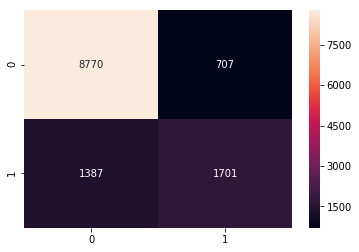

In [155]:
conf_metrix = metrics.confusion_matrix(y_test, y_test_predict)
print(conf_metrix)

sns.heatmap(conf_metrix, annot = True, fmt = 'd')

In [156]:
print( metrics.classification_report(y_test, y_test_predict) )

print(' accuracy : ', metrics.accuracy_score(y_test, y_test_predict))

# Number of Features  = 60

              precision    recall  f1-score   support

         0.0       0.86      0.93      0.89      9477
         1.0       0.71      0.55      0.62      3088

   micro avg       0.83      0.83      0.83     12565
   macro avg       0.78      0.74      0.76     12565
weighted avg       0.82      0.83      0.83     12565

 accuracy :  0.8333465976920016


# SVM (Support Vactor Machine)

In [174]:
# Splittin data into train- test

X_train, X_test, Y_train, Y_test = train_test_split(data, target, train_size = 0.7, random_state  = 0)

C:\Users\Aatif Khan Pathan\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning:

From version 0.21, test_size will always complement train_size unless both are specified.



In [175]:
# Model Salection

from sklearn.svm import SVC
classifier = SVC()

In [176]:
# Training model

classifier.fit(X_train,Y_train)

C:\Users\Aatif Khan Pathan\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning:

The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [177]:
# prediction

y_predict = classifier.predict(X_test)

In [178]:
metrics.accuracy_score(Y_test,y_predict)

# we get same accuracy using all 102 features or using only 60 features.

0.8308794269797055

[[8802  648]
 [1477 1638]]


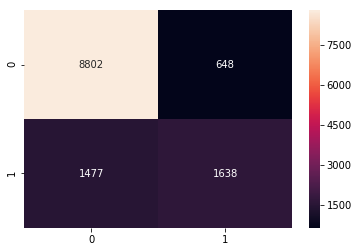

In [179]:
conf_metrix = metrics.confusion_matrix(Y_test, y_predict)
print(conf_metrix)

sns.heatmap(conf_metrix, annot = True, fmt = 'd')

In [47]:
print( metrics.classification_report(Y_test, y_predict) )

print(' accuracy : ', metrics.accuracy_score(Y_test, y_predict))

# Number of Features  = 60

              precision    recall  f1-score   support

       <=50K       0.86      0.93      0.89      9450
        >50K       0.72      0.53      0.61      3115

   micro avg       0.83      0.83      0.83     12565
   macro avg       0.79      0.73      0.75     12565
weighted avg       0.82      0.83      0.82     12565

 accuracy :  0.830799840827696


# Decision Tree

In [180]:
# Model Salection

from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth = 2)

In [181]:
# Training model

classifier.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [182]:
# Prediction

y_test_predict = classifier.predict(X_test)

<b>Measuring Performance</b>

In [183]:
# Accuracy

metrics.accuracy_score(Y_test,y_test_predict)

0.7992041384799045

[[7003 2474]
 [2270  818]]


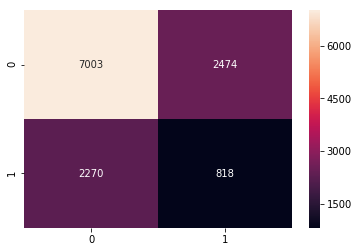

In [185]:
conf_metrix = metrics.confusion_matrix(y_test, y_test_predict)
print(conf_metrix)

sns.heatmap(conf_metrix, annot = True, fmt = 'd')

In [186]:
print( metrics.classification_report(y_test, y_test_predict) )

print(' accuracy : ', metrics.accuracy_score(Y_test, y_predict))

# Number of Features  = 60

              precision    recall  f1-score   support

         0.0       0.76      0.74      0.75      9477
         1.0       0.25      0.26      0.26      3088

   micro avg       0.62      0.62      0.62     12565
   macro avg       0.50      0.50      0.50     12565
weighted avg       0.63      0.62      0.63     12565

 accuracy :  0.8308794269797055
